<a href="https://colab.research.google.com/github/LilySaya/Cprogramming_Duke/blob/master/%20Maze_drawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTANT**: For students using Google Colab in Japanese, there could be a problem to print the maze. If the mazes are not displayed corectly, there are two possible solutions:
 - Use this link: https://colab.research.google.com/drive/1mNd_iKpEWUt1tITTJ4u7rRGQ_GwjEQ0Q?hl=ja
 - Switch to English language in ヘルプ menu

## Given Functions (nothing to do here)
- Random maze generation
- Maze drawing

In [ ]:
import random
import time

# You do *not* need to modify this function
def genRandMaze(n, p):
  """ Generate a random maze of size n x n
  p is the probability that there is a wall between each cell
  Starting point is always the top-left cell (cell 0)
  Goal is always the bottom-right cell (cell n^2-1)
  
  Cell are numbered from 0 to n^2-1 from top-left to bottom-right
  Output: a graph encoded with adjacency list.
          i.e. a list of n^2 lists of neighbors
  """
  adjList = [ [] for _ in range(n*n)]  # initialize n^2 empty lists
  
  # Generate vertical walls (on the right of cell c)
  for c in range(n*n):
    if c%n == n-1: continue  # skip the last column
    if random.random() > p:  # There is no wall
      adjList[c].append(c+1) # can move from cell c to c+1
      adjList[c+1].append(c) # can move from cell c+1 to c
    
  # Generate horizontal walls (below the cell c)
  for c in range(n*n - n):   # skip the last row
    if random.random() > p:  # There is no wall
      adjList[c].append(c+n) # can move from cell c to c+n
      adjList[c+n].append(c) # can move from cell c+n to c
    
  return adjList


# You do *not* need to modify this function
# This function works only for n >= 2
# (anyway, it does not make sense to have a maze of size 1x1...)
def printMaze(n, adjList, visited=None):
  """ Display the maze of size n x n corresponding to adjList
  
  visited is an optional argument:
  a list of Boolean value indicating wether a cell is visited or not
  it will be useful for function BFSMaze below
  
  Note: This function was funny to write.
        Have a look if you are curious :)
        But it is probably not very clear
  """
  # V, H, C are local functions callable only inside this printMaze function
  def V(c): return " " if c+1 in adjList[c] else "│"
  def H(c): return " " if c+n in adjList[c] else "─"
  def C(c): 
    if c == 0: return "S"
    elif visited==None or not visited[c]:
      if c == n**2-1: return "G"
      else: return " "
    else: return "X"
  print("┌"+"───┬"*(n-1)+"───┐")
  print("│ "+C(0)+" "+"".join(V(i)+" "+C(i+1)+" " for i in range(n-1))+"│")
  print("├─"+"─┼─".join(H(i) for i in range(n))+"─┤")
  for r in range(1, n-1):
    print("│ "+C(n*r)+" "+"".join(V(i)+" "+C(i+1)+" " for i in range(n*r, n*r+n-1))+"│")
    print("├─"+ "─┼─".join(H(i) for i in range(n*r,n*r+n))+"─┤")
  print("│"+"".join(" " + C(i)+" "+V(i) for i in range(n**2-n, n**2-1))+" "+C(n**2-1)+" │")
  print("└"+"───┴"*(n-1)+"───┘")


# Print some examples to test
maze1 = genRandMaze(3, 0.2)
printMaze(3, maze1)


┌───┬───┬───┐
│ S         │
├─ ─┼─ ─┼─ ─┤
│           │
├─ ─┼─ ─┼─ ─┤
│         G │
└───┴───┴───┘


## Maze Exploration (TODO HERE)
- Explore the maze and find if there is a path from Start to Goal

In [ ]:
from IPython.display import clear_output

# YOU NEED TO UPDATE THIS FUNCTION
# THERE ARE THREE LINES MISSING
# INDICATED BY XXXXXXX-TODO-XXXXXXX
def BFSMaze(n, adjList, start,goal,displayDetails=False):
  """ Execute a Breadth First Search algorithm on the maze
      and check if Goal cell is reachable from Start cell
      Return True if the goal is reachable and False if not.
      
      displayDetailsDetails is an optional argument that triggers
      step-by-step printing of the maze. Useful for debugging.
      But then should be set to False to do many simulations.
  """
  if displayDetails:
    print("Initial Maze")
    printMaze(n, adjList)
    time.sleep(1)
    
  # Initialization of the BFS
  visited = [False]*(n**2)  # Keep track of visited cells
  visited[start] = True         # starting cell (cell 0) is visited
  lastVisitedCells = [0]    # initially, only starting cell
  
  # Main loop of the BFS
  step = 0
  while True:
    step += 1                 # Count the number of iterations
    nextVisitedCells = []     # contains the cells that are reachable in one more step
    for c in lastVisitedCells:         # For each cell reached in the previous iteration
      for neigh in adjList[c]:         # look for all its neighbors and check if they have
        if not visited[neigh]:         # have already been visited by the BFS
          nextVisitedCells.append(neigh)
          visited[neigh]=True
    if nextVisitedCells == []:
      # No new cells visited; it means that BFS is finished
      # All cells connected to the starting cell have been explored
      break  # Exit the loop
    else: # Not yet over, let's update the set (list) of visited cells in the current iteration
      lastVisitedCells=nextVisitedCells
      if displayDetails:
        print(f"After {step} iterations, the following cells are reachable:")
        printMaze(n, adjList, visited)
        time.sleep(1)
    
  # From here, the execution of the BFS is over
  # Let's print and return the result (True or False)
  if displayDetails:
    if visited[goal]:    # could also write simpler “visited[-1]”
      print("There is a path from starting point to goal :)")
    else:
      print("There is no path from starting point to goal :(")
  return visited[goal]



# For testing a simple example
random.seed(0)
N = 4
P = 0.7
maze = genRandMaze(N, P)
BFSMaze(N, maze, 0,8,displayDetails=True)

Initial Maze
┌───┬───┬───┬───┐
│ S         │   │
├───┼─ ─┼───┼───┤
│   │   │   │   │
├─ ─┼─ ─┼─ ─┼─ ─┤
│       │   │   │
├───┼─ ─┼─ ─┼───┤
│   │       │ G │
└───┴───┴───┴───┘
After 1 iterations, the following cells are reachable:
┌───┬───┬───┬───┐
│ S   X     │   │
├───┼─ ─┼───┼───┤
│   │   │   │   │
├─ ─┼─ ─┼─ ─┼─ ─┤
│       │   │   │
├───┼─ ─┼─ ─┼───┤
│   │       │ G │
└───┴───┴───┴───┘
After 2 iterations, the following cells are reachable:
┌───┬───┬───┬───┐
│ S   X   X │   │
├───┼─ ─┼───┼───┤
│   │ X │   │   │
├─ ─┼─ ─┼─ ─┼─ ─┤
│       │   │   │
├───┼─ ─┼─ ─┼───┤
│   │       │ G │
└───┴───┴───┴───┘
After 3 iterations, the following cells are reachable:
┌───┬───┬───┬───┐
│ S   X   X │   │
├───┼─ ─┼───┼───┤
│   │ X │   │   │
├─ ─┼─ ─┼─ ─┼─ ─┤
│     X │   │   │
├───┼─ ─┼─ ─┼───┤
│   │       │ G │
└───┴───┴───┴───┘
After 4 iterations, the following cells are reachable:
┌───┬───┬───┬───┐
│ S   X   X │   │
├───┼─ ─┼───┼───┤
│   │ X │   │   │
├─ ─┼─ ─┼─ ─┼─ ─┤
│ X   X │   │   │
├───┼─ ─┼─ 

True

## Simulations (TODO HERE)

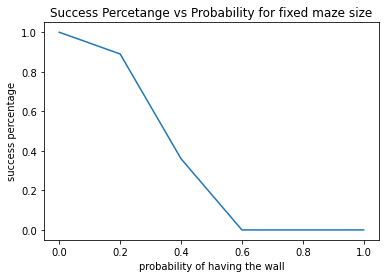

In [ ]:
import matplotlib.pyplot as plt       # To plot graphics directly in python

# YOU HAVE TO WRITE THIS FUNCTION
def simulateFixedParameters(n, p, nbSimus):
  """ Execute *nbSimus* simulations:
      - Generate a maze with parameters *n* and *p*
      - Check if there is a path from S to G
      Return the percentage of success (success=there is path from S to G)
  """
  success = 0
  for _ in range(nbSimus):
    maze = genRandMaze(n, p)
    if BFSMaze(n, maze,0,n**2-1,displayDetails=False):
      success+=1
  return success/nbSimus   # Of course you need to remove this “return 0”


# You do *not* need to modify this function
# But you can if you want to change something
def simulate_fixed_n(n, listP, nbSimus):
  """ Excecute nbSimus simulations for all values of p in listP
      Return the list of percentage of success for each value of p
  """
  results = []
  for p in listP:
    results.append(simulateFixedParameters(n, p, nbSimus) )
  return results

def simulate_fixed_p(listN,p,nbSimus):
  """Execute nbSimus simulations for all values of n in listN
     Return the list of percentage of success for each value of n
  """
  results = []
  for n in listN:
    results.append(simulateFixedParameters(n,p,nbSimus))
  return results

# simulate function gives us data that we can use
# to plot some nice curves
# You can/should modify the values below
listP = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
data_fixed_n = simulate_fixed_n(100, listP, 100)

# Example of curve that you can obtain
# Note: axis labels, title, ... are missing
#       they should be added to have proper graphic
plt.plot(listP, data_fixed_n)
plt.xlabel("probability of having the wall")
plt.ylabel("success percentage")
plt.title("Success Percetange vs Probability for fixed maze size")
plt.show()






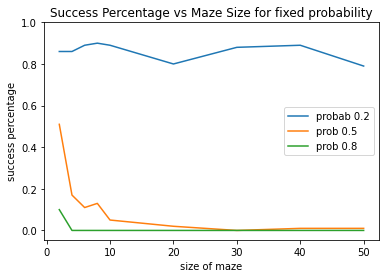

In [ ]:
listN = [2,4,6,8,10,20,30,40,50]
data_P_point2= simulate_fixed_p(listN,0.2,100)
data_P_point5=simulate_fixed_p(listN,0.5,100)
data_P_point8= simulate_fixed_p(listN,0.8,100)

plt.plot(listN,data_P_point2,label="probab 0.2")
plt.plot(listN,data_P_point5,label="prob 0.5")
plt.plot(listN,data_P_point8,label="prob 0.8")

plt.legend()
plt.xlabel("size of maze")
plt.yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.ylabel("success percentage")
plt.title("Success Percentage vs Maze Size for fixed probability")
plt.show()